# **Review-II**
# **TEAM-15 - Social Editorial Collaborative Pattern Analysis**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORTING THE LIBRARIES**

In [ ]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict

/opt/conda/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


In [ ]:
pip install nxviz

**CHECKING WITH THE VERSIONS**

In [ ]:
print(f'NetworkX version: {nx.__version__}')
#print(f'NXViz version: {nv.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

NetworkX version: 2.6.3
Matplotlib version: 3.5.3


# **# CREATING THE DIRECTORY FUNCTIONS**

In [ ]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')
        
    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')

# **LOADING DATASET**

In [ ]:
data_dir = Path('data/2020-05-21_intro_to_network_analysis_in_python')
images_dir = Path('Images/2020-05-21_intro_to_network_analysis_in_python')

In [ ]:
data_dir

PosixPath('data/2020-05-21_intro_to_network_analysis_in_python')

# **DATASET**

In [ ]:
twitter = 'https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p'
github = 'https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p'

In [ ]:
datasets = [twitter, github]
data_paths = list()

for data in datasets:
    file_name = data.split('/')[-1].replace('?raw=true', '')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, data)
    data_paths.append(data_path)

Directory Exists
File Exists
Directory Exists
File Exists


In [ ]:
T = nx.read_gpickle(data_paths[0])
Gh = nx.read_gpickle(data_paths[1])

# **PART-I**
# **BASIC NETWORK CREATION**

**NERWORK X**

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [ ]:
G.add_edge(1, 2)
G.edges()

EdgeView([(1, 2)])

In [ ]:
G.nodes[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

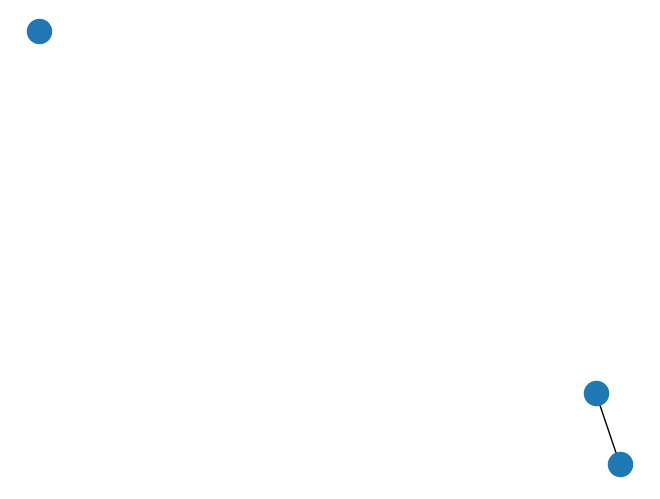

In [ ]:
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

**using Twitter network**

In [ ]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(type(list(T.edges(data=True))[-1][2]))

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
<class 'dict'>


# **Basic drawing of a network using NetworkX**

**Creating T_sub**

In [ ]:
T_sub = nx.DiGraph()
edges_from_T = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_from_T)

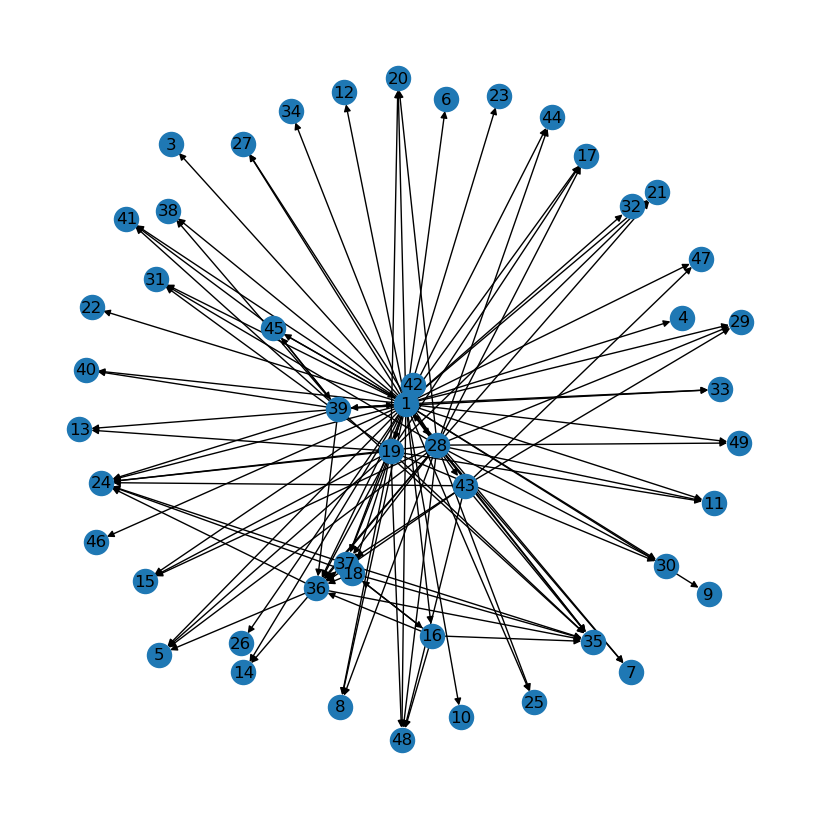

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

In [ ]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]

In [ ]:
print(noi[:10])
print(eoi[:10])


[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


# **Types of Graphs**

In [ ]:
import networkx as nx

G = nx.Graph()
type(G)

networkx.classes.graph.Graph

In [ ]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [ ]:
M = nx.MultiGraph
type(M)

type

In [ ]:
MD = nx.MultiDiGraph
type(MD)

type

# **Specifying a weight on edges**

In [ ]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

# **Checking the presence of self-loops in the graph**

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
# number_of_selfloops() is deprecated
assert len(list(nx.selfloop_edges(T))) == len(find_selfloop_nodes(T))

In [ ]:
len(list(nx.selfloop_edges(T)))

42

# **Network Visualization**

**Visualizing using Matrix plots**

In [ ]:
import nxviz as nv
import matplotlib.pyplot as plt

In [ ]:
selected_nodes = [n for n,v in T.nodes(data=True) if n <= 101] 
len(selected_nodes)

100

In [ ]:
pip install git+https://github.com/ericmjl/nxviz.git

  Cloning https://github.com/ericmjl/nxviz.git to /tmp/pip-req-build-sib6k_5y
  Running command git clone --filter=blob:none --quiet https://github.com/ericmjl/nxviz.git /tmp/pip-req-build-sib6k_5y
  Resolved https://github.com/ericmjl/nxviz.git to commit fe3e491f0dfa2a493b7f39cc2e8ecd57ab319381
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
T100 = T.subgraph(selected_nodes).copy()

In [ ]:
T100

TypeError: draw() takes 0 positional arguments but 1 was given

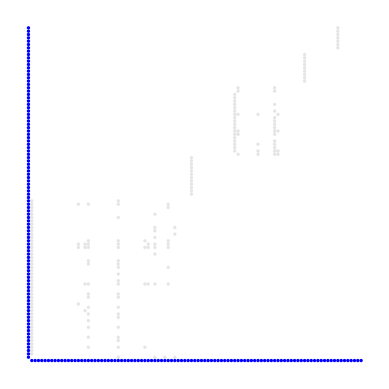

In [ ]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T100)

# Draw m to the screen
m.draw()

# Display the plot
plt.show();

# **Visualizing using Circos plots**

TypeError: draw() takes 0 positional arguments but 1 was given

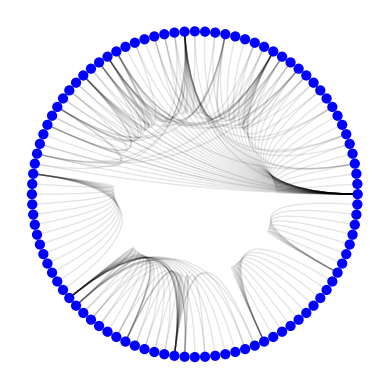

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T100)

# Draw c to the screen
c.draw()

# Display the plot
plt.show();

# **Visualizing using Arc plots**

In [ ]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T100)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [ ]:
selected_nodes = [n for n,v in T.nodes(data=True) if n <= 21] 
print(len(selected_nodes))
T20 = T.subgraph(selected_nodes).copy()

20


TypeError: draw() takes 0 positional arguments but 1 was given

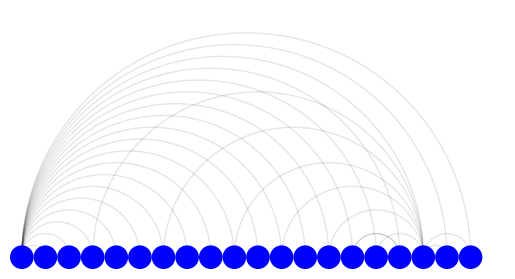

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T20)

# Draw a to the screen
a.draw()

# Display the plot
plt.show();

TypeError: draw() takes 0 positional arguments but 1 was given

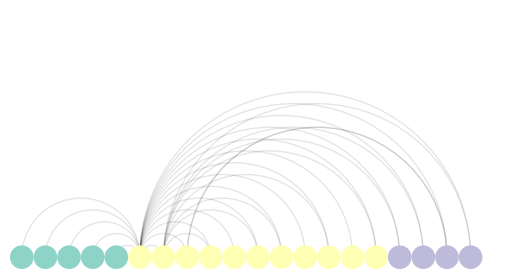

In [ ]:
# Create the customized ArcPlot object: a2
a2 = ArcPlot(T20, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show();

# **PART-II**
# **Identifying Important NODES**
*   **a) Compute number of neighbours for each node**
*  **b) Compute Degree Distribution**
*  **c) Degree Centrality Distribution**
*   **d) Shortest Path**
*  **e) NetworkX Betweeness Centrality on Social Network**
*   **f) Deep DIve - Twitter Network**









# **Compute number of neighbors for each node**

In [ ]:
print(list(T100.neighbors(1)))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T100, 6)
print(six_nbrs)

{64}


# **Compute degree distribution**

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(list(T100.neighbors(n))) for n in T100.nodes()]

# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 15, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 9, 0, 0, 1, 7, 0, 3, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 15, 4, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0]


# **Degree centrality distribution**
**The degree centrality is the number of neighbors divided by all possible neighbors that it could have.**

In [ ]:
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]
degrees[:20]

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 10, 27, 0, 0]

In [ ]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

In [ ]:
deg_cent

{'u2022': 0.5483870967741935,
 'u2643': 0.3548387096774194,
 'u322': 0.3064516129032258,
 'u9869': 0.29032258064516125,
 'u315': 0.24193548387096775,
 'u2906': 0.22580645161290322,
 'u96': 0.2096774193548387,
 'u156': 0.2096774193548387,
 'u297': 0.2096774193548387,
 'u698': 0.2096774193548387,
 'u863': 0.2096774193548387,
 'u2066': 0.2096774193548387,
 'u2482': 0.2096774193548387,
 'u2552': 0.2096774193548387,
 'u4159': 0.2096774193548387,
 'u7963': 0.2096774193548387,
 'u9997': 0.2096774193548387,
 'u10500': 0.2096774193548387,
 'u640': 0.1935483870967742,
 'u821': 0.1935483870967742,
 'u1908': 0.1935483870967742,
 'u3083': 0.1935483870967742,
 'u3174': 0.1935483870967742,
 'u3974': 0.1935483870967742,
 'u3979': 0.1935483870967742,
 'u4412': 0.1935483870967742,
 'u4710': 0.1935483870967742,
 'u4953': 0.1935483870967742,
 'u69': 0.11290322580645161,
 'u435': 0.11290322580645161,
 'u7623': 0.11290322580645161,
 'u8135': 0.11290322580645161,
 'u9866': 0.11290322580645161,
 'u10340': 0.1

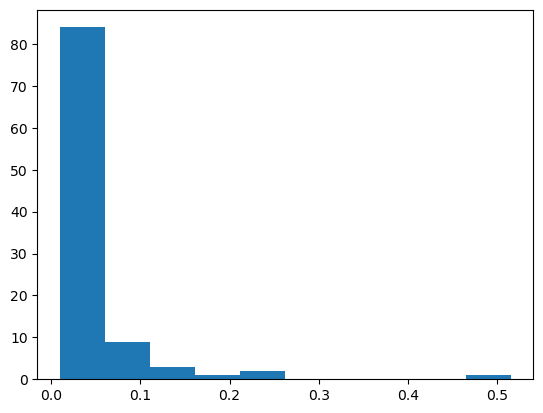

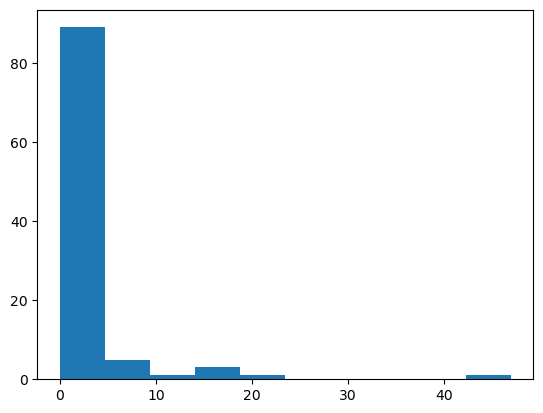

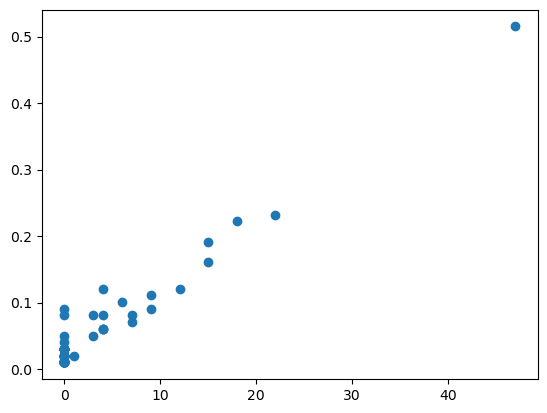

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T100)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show();

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show();

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show();

# **Graph Algorithms**
**Finding Paths**

***Path Finding is Important for Optimisation & Modelling.***

***One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm.***

# **Shortest Path I**
**Checking whether the destination node is present in neighbors**

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

# **Shortest Path II**
**Checking Whether the destination node is not present in the neighbors**

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

# **Shortest Path III**
**Checking if there's no path between two nodes**

In [ ]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

# **Betweenness Centrality**
**Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.**

In [ ]:
G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

**Key - Indicates Node & Value Indicates the respective betweenness Centrality of that node**

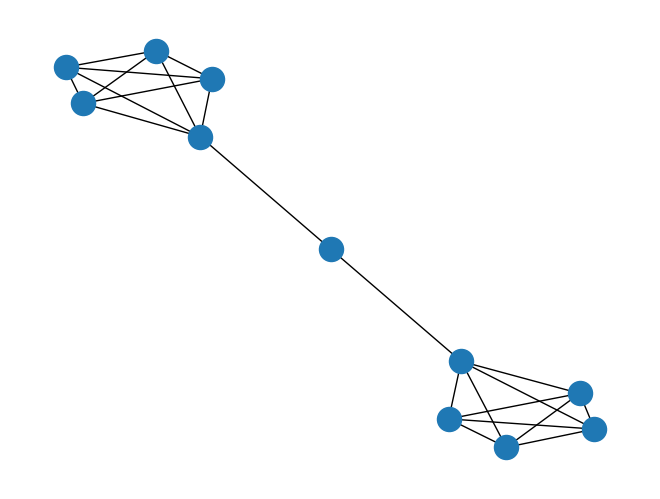

In [ ]:
nx.draw(G)
plt.show()

# **NetworkX betweenness centrality on a social network**

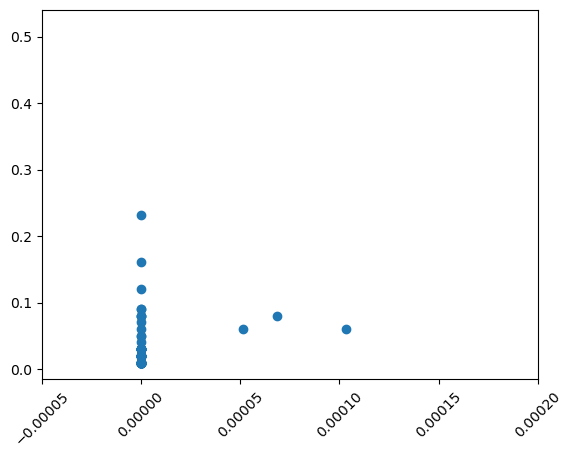

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T100)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T100)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.xlim(-0.00005, 0.0002)
plt.xticks(rotation=45)
plt.show()

# **Deep dive - Twitter network**
**Finding the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.**

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(f'It looks like node {top_dc} has the highest degree centrality')

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

It looks like node {11824} has the highest degree centrality


# **Deep dive - Twitter network part II**
**Find the nodes that have highest Betweeness Centrality in the network**

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T100)
print(f'Node {top_bc} has the highest betweenness centrality.')

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T100)[node] == max(nx.betweenness_centrality(T100).values())

Node {1} has the highest betweenness centrality.


# **PART-III**

# **Analysing the Structure of the Network**
*   **a) Finding Open Triangles**
*   **b) Finding all Maximum cliques of size n**
*   **c) Sub Graph - I**
*   **d) Sub Graph - II**








# **Identifying Cliques**
**Finding all the triangles that a node is involved in the network**

In [ ]:
T100

In [ ]:
for n in list(combinations(T100.nodes(), 2))[:10]:
    print(n[0], n[1])

1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12



# **Identifying triangle relationships**
**One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.**

In [ ]:
# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

is_in_triangle(T, 1)


True

In [ ]:
for node in sorted(list(T.nodes())[:60]):
    x = is_in_triangle(T, node)
    if x == True:
        print(f'{node}: {x}')

1: True
16: True
18: True
19: True
28: True
36: True
39: True
43: True
45: True


# **Finding nodes involved in triangles**
**NetworkX provides an API for counting the number of triangles that every node is involved in.**

**Extracted all the nodes involved in a triangle relationship with a given node.**

In [ ]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 23

# **Finding open triangles**

In [ ]:
# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(f'{num_open_triangles} nodes in graph T are in open triangles.')

908 nodes in graph T are in open triangles.


# **Maximal Cliques**
# **Communities**

**The concept of maximal cliques has its uses in community finding algorithms.**

In [ ]:
G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

<generator object find_cliques at 0x7fbd20c39650>

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]


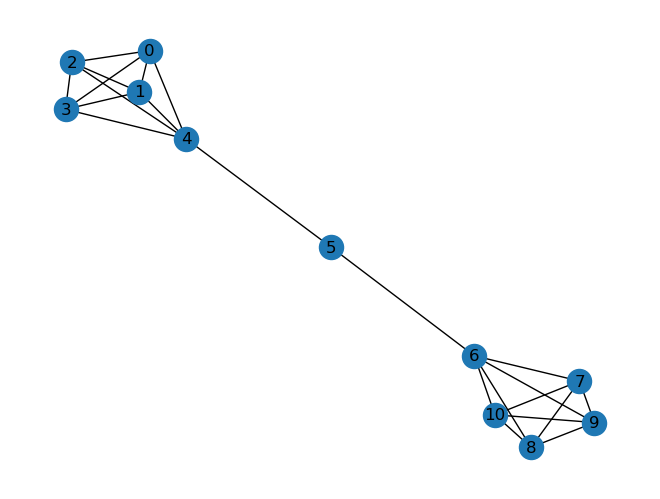

In [ ]:
gl = list(nx.find_cliques(G))
print(gl)
nx.draw(G, with_labels=True)

# **Finding all maximal cliques of size "n"**

**Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities.**

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7], [7, 8, 9, 10, 11]]


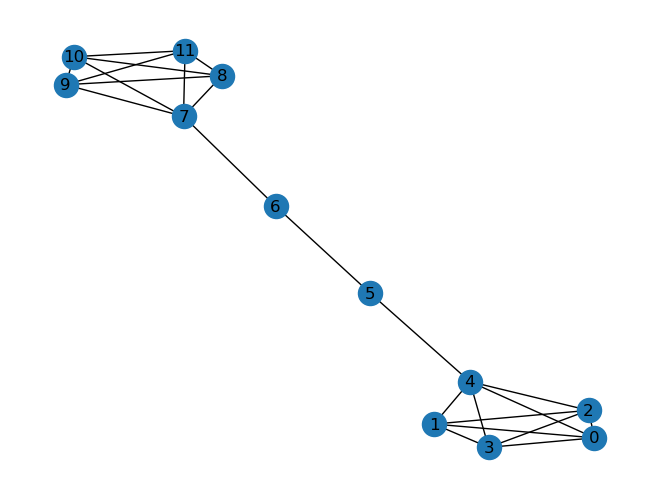

In [ ]:
G2 = nx.barbell_graph(m1=5, m2=2)
gl2 = list(nx.find_cliques(G2))
print(gl2)
nx.draw(G2, with_labels=True)

In [ ]:
nodes = {1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}}
edges = [(1, 3, {'date': date(2012, 11, 16)}), (1, 4, {'date': date(2013, 6, 7)}), (1, 5, {'date': date(2009, 7, 27)}), (1, 6, {'date': date(2014, 12, 18)}), (1, 7, {'date': date(2010, 10, 18)}), (1, 8, {'date': date(2012, 4, 18)}), (1, 9, {'date': date(2007, 10, 14)}), (1, 10, {'date': date(2012, 9, 8)}), (1, 11, {'date': date(2010, 1, 6)}), (1, 12, {'date': date(2012, 12, 27)}), (1, 13, {'date': date(2008, 12, 18)}), (1, 14, {'date': date(2014, 5, 25)}), (1, 15, {'date': date(2009, 11, 12)}), (1, 16, {'date': date(2008, 8, 6)}), (1, 17, {'date': date(2007, 8, 11)}), (1, 18, {'date': date(2009, 10, 7)}), (1, 19, {'date': date(2008, 7, 24)}), (1, 20, {'date': date(2013, 11, 18)}), (1, 21, {'date': date(2011, 3, 28)}), (1, 22, {'date': date(2013, 3, 4)}), (1, 23, {'date': date(2012, 4, 20)}), (1, 24, {'date': date(2009, 6, 6)}), (1, 25, {'date': date(2013, 6, 18)}), (1, 26, {'date': date(2014, 11, 20)}), (1, 27, {'date': date(2007, 4, 28)}), (1, 28, {'date': date(2014, 3, 28)}), (1, 29, {'date': date(2014, 1, 23)}), (1, 30, {'date': date(2007, 10, 9)}), (1, 31, {'date': date(2009, 2, 17)}), (1, 32, {'date': date(2009, 10, 14)}), (1, 33, {'date': date(2010, 5, 19)}), (1, 34, {'date': date(2009, 12, 21)}), (1, 35, {'date': date(2014, 11, 16)}), (1, 36, {'date': date(2010, 2, 25)}), (1, 37, {'date': date(2010, 9, 23)}), (1, 38, {'date': date(2007, 4, 28)}), (1, 39, {'date': date(2007, 4, 8)}), (1, 40, {'date': date(2010, 5, 15)}), (1, 41, {'date': date(2009, 8, 12)}), (1, 42, {'date': date(2013, 3, 9)}), (1, 43, {'date': date(2011, 11, 14)}), (1, 44, {'date': date(2013, 4, 6)}), (1, 45, {'date': date(2010, 1, 18)}), (1, 46, {'date': date(2011, 8, 20)}), (1, 47, {'date': date(2014, 8, 3)}), (1, 48, {'date': date(2010, 3, 15)}), (1, 49, {'date': date(2007, 9, 2)}), (5, 19, {'date': date(2013, 6, 12)}), (5, 28, {'date': date(2010, 12, 4)}), (5, 36, {'date': date(2013, 4, 7)}), (7, 28, {'date': date(2011, 11, 21)}), (8, 19, {'date': date(2010, 11, 5)}), (8, 28, {'date': date(2007, 6, 26)}), (11, 19, {'date': date(2012, 4, 16)}), (11, 28, {'date': date(2011, 6, 21)}), (13, 19, {'date': date(2012, 12, 13)}), (14, 28, {'date': date(2013, 12, 18)}), (15, 19, {'date': date(2008, 12, 13)}), (15, 28, {'date': date(2014, 6, 3)}), (16, 18, {'date': date(2008, 8, 5)}), (16, 35, {'date': date(2014, 6, 4)}), (16, 36, {'date': date(2008, 10, 10)}), (16, 48, {'date': date(2014, 1, 27)}), (17, 19, {'date': date(2007, 11, 11)}), (17, 28, {'date': date(2012, 10, 11)}), (18, 24, {'date': date(2009, 2, 4)}), (18, 35, {'date': date(2008, 12, 1)}), (18, 36, {'date': date(2013, 2, 6)}), (19, 20, {'date': date(2008, 11, 9)}), (19, 21, {'date': date(2007, 7, 23)}), (19, 24, {'date': date(2013, 12, 13)}), (19, 30, {'date': date(2012, 6, 6)}), (19, 31, {'date': date(2011, 1, 27)}), (19, 35, {'date': date(2014, 3, 3)}), (19, 36, {'date': date(2007, 10, 22)}), (19, 37, {'date': date(2008, 4, 20)}), (19, 48, {'date': date(2010, 12, 23)}), (20, 28, {'date': date(2012, 4, 15)}), (21, 28, {'date': date(2014, 4, 27)}), (24, 28, {'date': date(2013, 1, 27)}), (24, 36, {'date': date(2009, 4, 23)}), (24, 37, {'date': date(2008, 6, 27)}), (24, 39, {'date': date(2007, 1, 27)}), (24, 43, {'date': date(2014, 2, 12)}), (25, 28, {'date': date(2014, 5, 9)}), (27, 28, {'date': date(2007, 8, 9)}), (28, 29, {'date': date(2012, 4, 3)}), (28, 30, {'date': date(2007, 12, 2)}), (28, 31, {'date': date(2008, 6, 1)}), (28, 35, {'date': date(2012, 11, 16)}), (28, 36, {'date': date(2012, 9, 26)}), (28, 37, {'date': date(2014, 11, 12)}), (28, 44, {'date': date(2007, 11, 18)}), (28, 48, {'date': date(2008, 5, 25)}), (28, 49, {'date': date(2011, 12, 19)}), (29, 43, {'date': date(2014, 6, 4)}), (33, 39, {'date': date(2011, 9, 5)}), (35, 36, {'date': date(2008, 12, 1)}), (35, 37, {'date': date(2014, 5, 7)}), (35, 39, {'date': date(2007, 6, 17)}), (35, 43, {'date': date(2009, 6, 10)}), (36, 37, {'date': date(2014, 5, 13)}), (36, 39, {'date': date(2014, 12, 6)}), (36, 43, {'date': date(2013, 12, 17)}), (37, 43, {'date': date(2012, 1, 22)}), (38, 39, {'date': date(2009, 5, 15)}), (39, 40, {'date': date(2011, 6, 3)}), (39, 41, {'date': date(2009, 10, 5)}), (39, 45, {'date': date(2011, 1, 12)}), (41, 45, {'date': date(2009, 9, 7)}), (43, 47, {'date': date(2014, 12, 21)}), (43, 48, {'date': date(2013, 1, 28)})]

t_321 = nx.Graph()
t_321.add_nodes_from(nodes)
t_321.add_edges_from(edges)
nx.set_node_attributes(t_321, nodes)

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, n):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == n:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(t_321, 3)) == 33

# **Subgraphs**
**Visualising Random Sub Graph of the given Network**

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

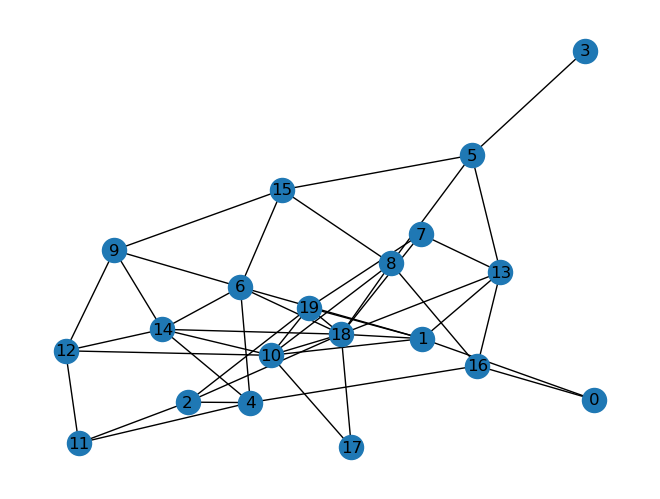

In [ ]:
nx.draw(G, with_labels=True)

# **Subgraphs I**
**Visualising The Sub-Graph of the graph extracting all the adjacent nodes of a particular node.**

In [ ]:
nodes = list(G.neighbors(8))
nodes

[5, 10, 15, 16, 18]

In [ ]:
nodes.append(8)
G_eight = G.subgraph(nodes)
G_eight.edges()

EdgeView([(5, 8), (5, 15), (8, 10), (8, 15), (8, 16), (8, 18), (10, 18)])

In [ ]:
display(G_eight)
display(G)

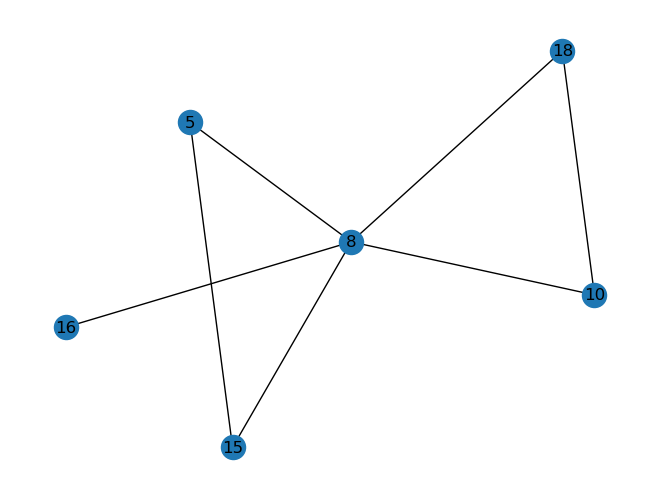

In [ ]:
nx.draw(G_eight, with_labels=True)

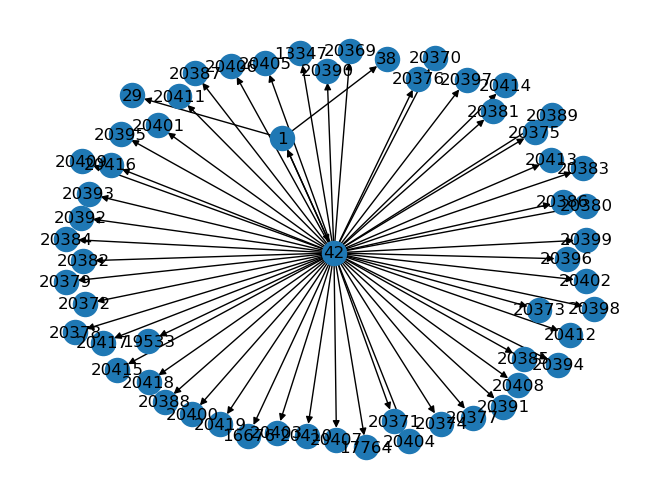

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

# **Subgraphs II**
**Extract nodes that have a particular metadata property and their neighbors.**

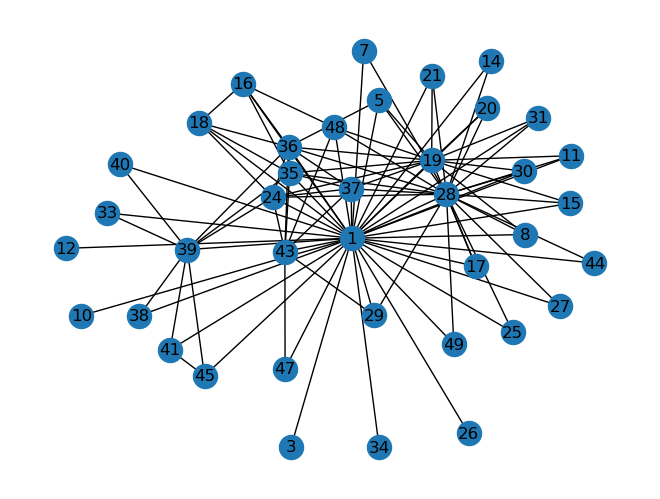

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in t_321.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = t_321.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = t_321.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub, with_labels=True)
plt.show()

# **PART-IV**
# **Developing A Recommender System**

* **Visualise the Netwrok**:

         a. Matrix plot
         b. Arc Plot
         c. Circos Plot       
*   **Finding Cliques**
*   **Finding Important Collaborators**
*   **Characterising Editing Communities**
*   **Recommending Co-Editors in GitHub Who have yet to edit together**









# **4.1 Visualising The Network**

# **Graph Properties -** 
**a) Understanding the graph properties by getting graph size.**

**b) Computing Betweeness Centrality & Degree Centrality of each node in the graph.**

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.2)
print(len(G.edges()))
print(len(G.nodes()))

45
20


In [ ]:
pp(nx.degree_centrality(G))
print('\n')
pp(nx.betweenness_centrality(G))

{0: 0.10526315789473684,
 1: 0.3157894736842105,
 2: 0.21052631578947367,
 3: 0.05263157894736842,
 4: 0.2631578947368421,
 5: 0.21052631578947367,
 6: 0.3157894736842105,
 7: 0.15789473684210525,
 8: 0.2631578947368421,
 9: 0.21052631578947367,
 10: 0.3684210526315789,
 11: 0.15789473684210525,
 12: 0.21052631578947367,
 13: 0.2631578947368421,
 14: 0.3157894736842105,
 15: 0.21052631578947367,
 16: 0.21052631578947367,
 17: 0.10526315789473684,
 18: 0.5263157894736842,
 19: 0.2631578947368421}


{0: 0.003759398496240601,
 1: 0.08607630186577553,
 2: 0.044040657198551936,
 3: 0.0,
 4: 0.07446393762183234,
 5: 0.11647173489278752,
 6: 0.08880534670008351,
 7: 0.0051239209133945975,
 8: 0.11155666945140628,
 9: 0.024477861319966585,
 10: 0.10698969646338068,
 11: 0.01189083820662768,
 12: 0.0339459760512392,
 13: 0.09337231968810916,
 14: 0.05116959064327485,
 15: 0.05334168755221386,
 16: 0.06688944583681425,
 17: 0.0,
 18: 0.22528543581175156,
 19: 0.02456140350877193}


# **Characterizing the network (I)**

**Basic Characterisation of network by identifying number of nodes & edges in the network**

In [ ]:
G = nx.Graph(Gh)
print(len(G.nodes()))
print(len(G.edges()))

56519
72900


# **Characterizing the network (II)**

**Plotting the Degree centrality distribution of the GitHub collaboration network.**

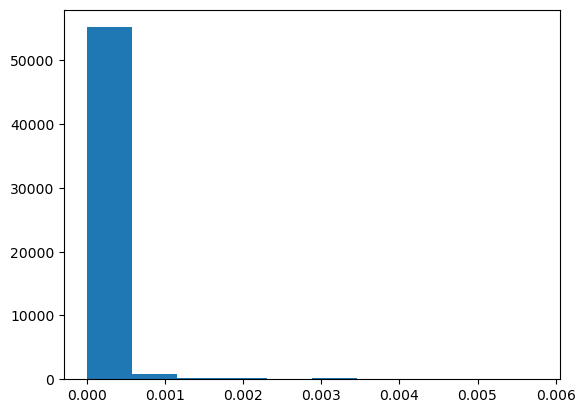

In [ ]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

# **Characterizing the network (III)**
**Plotting the betweenness centrality distribution of the GitHub collaboration network.**

In [ ]:
nodes = {'u41': {'bipartite': 'users', 'grouping': 0}, 'u69': {'bipartite': 'users', 'grouping': 0}, 'u96': {'bipartite': 'users', 'grouping': 0}, 'u156': {'bipartite': 'users', 'grouping': 0}, 'u297': {'bipartite': 'users', 'grouping': 0}, 'u298': {'bipartite': 'users', 'grouping': 0}, 'u315': {'bipartite': 'users', 'grouping': 0}, 'u322': {'bipartite': 'users', 'grouping': 0}, 'u435': {'bipartite': 'users', 'grouping': 0}, 'u440': {'bipartite': 'users', 'grouping': 0}, 'u640': {'bipartite': 'users', 'grouping': 0}, 'u655': {'bipartite': 'users', 'grouping': 0}, 'u698': {'bipartite': 'users', 'grouping': 0}, 'u821': {'bipartite': 'users', 'grouping': 0}, 'u863': {'bipartite': 'users', 'grouping': 0}, 'u901': {'bipartite': 'users', 'grouping': 0}, 'u914': {'bipartite': 'users', 'grouping': 0}, 'u1254': {'bipartite': 'users', 'grouping': 0}, 'u1407': {'bipartite': 'users', 'grouping': 0}, 'u1468': {'bipartite': 'users', 'grouping': 0}, 'u1908': {'bipartite': 'users', 'grouping': 0}, 'u2022': {'bipartite': 'users', 'grouping': 0}, 'u2066': {'bipartite': 'users', 'grouping': 0}, 'u2137': {'bipartite': 'users', 'grouping': 0}, 'u2289': {'bipartite': 'users', 'grouping': 0}, 'u2482': {'bipartite': 'users', 'grouping': 0}, 'u2552': {'bipartite': 'users', 'grouping': 0}, 'u2643': {'bipartite': 'users', 'grouping': 0}, 'u2737': {'bipartite': 'users', 'grouping': 0}, 'u2906': {'bipartite': 'users', 'grouping': 0}, 'u3083': {'bipartite': 'users', 'grouping': 0}, 'u3174': {'bipartite': 'users', 'grouping': 0}, 'u3231': {'bipartite': 'users', 'grouping': 0}, 'u3243': {'bipartite': 'users', 'grouping': 0}, 'u3271': {'bipartite': 'users', 'grouping': 0}, 'u3658': {'bipartite': 'users', 'grouping': 0}, 'u3974': {'bipartite': 'users', 'grouping': 0}, 'u3979': {'bipartite': 'users', 'grouping': 0}, 'u4159': {'bipartite': 'users', 'grouping': 0}, 'u4199': {'bipartite': 'users', 'grouping': 0}, 'u4329': {'bipartite': 'users', 'grouping': 0}, 'u4412': {'bipartite': 'users', 'grouping': 0}, 'u4513': {'bipartite': 'users', 'grouping': 0}, 'u4710': {'bipartite': 'users', 'grouping': 0}, 'u4761': {'bipartite': 'users', 'grouping': 0}, 'u4953': {'bipartite': 'users', 'grouping': 0}, 'u5082': {'bipartite': 'users', 'grouping': 0}, 'u5337': {'bipartite': 'users', 'grouping': 0}, 'u5693': {'bipartite': 'users', 'grouping': 0}, 'u5993': {'bipartite': 'users', 'grouping': 0}, 'u6081': {'bipartite': 'users', 'grouping': 0}, 'u7418': {'bipartite': 'users', 'grouping': 0}, 'u7623': {'bipartite': 'users', 'grouping': 0}, 'u7963': {'bipartite': 'users', 'grouping': 0}, 'u8135': {'bipartite': 'users', 'grouping': 0}, 'u9866': {'bipartite': 'users', 'grouping': 0}, 'u9869': {'bipartite': 'users', 'grouping': 0}, 'u9997': {'bipartite': 'users', 'grouping': 0}, 'u10090': {'bipartite': 'users', 'grouping': 0}, 'u10340': {'bipartite': 'users', 'grouping': 0}, 'u10500': {'bipartite': 'users', 'grouping': 0}, 'u10603': {'bipartite': 'users', 'grouping': 0}, 'u14964': {'bipartite': 'users', 'grouping': 1}}
edges = [('u41', 'u2022', {}), ('u41', 'u69', {}), ('u41', 'u5082', {}), ('u41', 'u298', {}), ('u41', 'u901', {}), ('u69', 'u315', {}), ('u69', 'u4513', {}), ('u69', 'u5082', {}), ('u69', 'u901', {}), ('u69', 'u298', {}), ('u69', 'u2022', {}), ('u96', 'u315', {}), ('u96', 'u2482', {}), ('u96', 'u10500', {}), ('u96', 'u2022', {}), ('u96', 'u863', {}), ('u96', 'u9997', {}), ('u96', 'u297', {}), ('u96', 'u698', {}), ('u96', 'u2066', {}), ('u96', 'u7963', {}), ('u96', 'u156', {}), ('u96', 'u2906', {}), ('u96', 'u2552', {}), ('u156', 'u315', {}), ('u156', 'u2482', {}), ('u156', 'u10500', {}), ('u156', 'u863', {}), ('u156', 'u2022', {}), ('u156', 'u297', {}), ('u156', 'u9997', {}), ('u156', 'u698', {}), ('u156', 'u2066', {}), ('u156', 'u7963', {}), ('u156', 'u2906', {}), ('u156', 'u2552', {}), ('u297', 'u315', {}), ('u297', 'u2482', {}), ('u297', 'u863', {}), ('u297', 'u2022', {}), ('u297', 'u9997', {}), ('u297', 'u698', {}), ('u297', 'u10500', {}), ('u297', 'u2066', {}), ('u297', 'u7963', {}), ('u297', 'u2906', {}), ('u297', 'u2552', {}), ('u298', 'u5082', {}), ('u298', 'u901', {}), ('u298', 'u2022', {}), ('u315', 'u2482', {}), ('u315', 'u10500', {}), ('u315', 'u2022', {}), ('u315', 'u863', {}), ('u315', 'u9997', {}), ('u315', 'u698', {}), ('u315', 'u2066', {}), ('u315', 'u7963', {}), ('u315', 'u2906', {}), ('u315', 'u4513', {}), ('u315', 'u2552', {}), ('u322', 'u3174', {}), ('u322', 'u3974', {}), ('u322', 'u7623', {}), ('u322', 'u8135', {}), ('u322', 'u2022', {}), ('u322', 'u4953', {}), ('u322', 'u640', {}), ('u322', 'u4412', {}), ('u322', 'u10340', {}), ('u322', 'u4159', {}), ('u322', 'u1908', {}), ('u322', 'u3979', {}), ('u322', 'u435', {}), ('u322', 'u821', {}), ('u322', 'u9869', {}), ('u322', 'u9866', {}), ('u322', 'u10603', {}), ('u322', 'u3083', {}), ('u322', 'u4710', {}), ('u435', 'u7623', {}), ('u435', 'u8135', {}), ('u435', 'u2022', {}), ('u435', 'u10603', {}), ('u435', 'u10340', {}), ('u435', 'u9866', {}), ('u440', 'u5693', {}), ('u440', 'u2643', {}), ('u440', 'u10090', {}), ('u440', 'u3271', {}), ('u640', 'u1908', {}), ('u640', 'u3174', {}), ('u640', 'u3979', {}), ('u640', 'u3974', {}), ('u640', 'u821', {}), ('u640', 'u4953', {}), ('u640', 'u4412', {}), ('u640', 'u9869', {}), ('u640', 'u4159', {}), ('u640', 'u4710', {}), ('u640', 'u3083', {}), ('u655', 'u2643', {}), ('u655', 'u2906', {}), ('u655', 'u2137', {}), ('u655', 'u914', {}), ('u655', 'u4513', {}), ('u698', 'u10500', {}), ('u698', 'u2066', {}), ('u698', 'u2906', {}), ('u698', 'u2552', {}), ('u698', 'u9997', {}), ('u698', 'u7963', {}), ('u698', 'u2482', {}), ('u698', 'u863', {}), ('u698', 'u2022', {}), ('u821', 'u3174', {}), ('u821', 'u3974', {}), ('u821', 'u4953', {}), ('u821', 'u4412', {}), ('u821', 'u4159', {}), ('u821', 'u1908', {}), ('u821', 'u3979', {}), ('u821', 'u9869', {}), ('u821', 'u4710', {}), ('u821', 'u3083', {}), ('u863', 'u10500', {}), ('u863', 'u2022', {}), ('u863', 'u7963', {}), ('u863', 'u2906', {}), ('u863', 'u2482', {}), ('u863', 'u9997', {}), ('u863', 'u2552', {}), ('u863', 'u2066', {}), ('u901', 'u2022', {}), ('u901', 'u5082', {}), ('u914', 'u2022', {}), ('u914', 'u3231', {}), ('u1254', 'u2737', {}), ('u1254', 'u2289', {}), ('u1254', 'u2643', {}), ('u1254', 'u4329', {}), ('u1254', 'u4761', {}), ('u1407', 'u2643', {}), ('u1407', 'u6081', {}), ('u1407', 'u3658', {}), ('u1468', 'u5993', {}), ('u1468', 'u2643', {}), ('u1468', 'u2022', {}), ('u1468', 'u7418', {}), ('u1468', 'u5337', {}), ('u1468', 'u9869', {}), ('u1908', 'u3174', {}), ('u1908', 'u3979', {}), ('u1908', 'u3974', {}), ('u1908', 'u4953', {}), ('u1908', 'u4412', {}), ('u1908', 'u9869', {}), ('u1908', 'u4159', {}), ('u1908', 'u4710', {}), ('u1908', 'u3083', {}), ('u2022', 'u2482', {}), ('u2022', 'u5993', {}), ('u2022', 'u7623', {}), ('u2022', 'u8135', {}), ('u2022', 'u10500', {}), ('u2022', 'u10340', {}), ('u2022', 'u9997', {}), ('u2022', 'u3231', {}), ('u2022', 'u2643', {}), ('u2022', 'u2906', {}), ('u2022', 'u5082', {}), ('u2022', 'u4199', {}), ('u2022', 'u9869', {}), ('u2022', 'u2066', {}), ('u2022', 'u9866', {}), ('u2022', 'u7418', {}), ('u2022', 'u7963', {}), ('u2022', 'u5337', {}), ('u2022', 'u10603', {}), ('u2022', 'u2552', {}), ('u2066', 'u10500', {}), ('u2066', 'u7963', {}), ('u2066', 'u2906', {}), ('u2066', 'u2482', {}), ('u2066', 'u9997', {}), ('u2066', 'u2552', {}), ('u2137', 'u2643', {}), ('u2137', 'u4513', {}), ('u2289', 'u4329', {}), ('u2289', 'u4761', {}), ('u2289', 'u2643', {}), ('u2289', 'u2737', {}), ('u2482', 'u10500', {}), ('u2482', 'u7963', {}), ('u2482', 'u2906', {}), ('u2482', 'u9997', {}), ('u2482', 'u2552', {}), ('u2552', 'u10500', {}), ('u2552', 'u9997', {}), ('u2552', 'u2906', {}), ('u2552', 'u7963', {}), ('u2643', 'u10090', {}), ('u2643', 'u5993', {}), ('u2643', 'u5693', {}), ('u2643', 'u4329', {}), ('u2643', 'u4761', {}), ('u2643', 'u9869', {}), ('u2643', 'u6081', {}), ('u2643', 'u2737', {}), ('u2643', 'u3658', {}), ('u2643', 'u3243', {}), ('u2643', 'u7418', {}), ('u2643', 'u5337', {}), ('u2643', 'u4513', {}), ('u2643', 'u3271', {}), ('u2737', 'u4329', {}), ('u2737', 'u4761', {}), ('u2906', 'u10500', {}), ('u2906', 'u9997', {}), ('u2906', 'u7963', {}), ('u3083', 'u3174', {}), ('u3083', 'u3974', {}), ('u3083', 'u4953', {}), ('u3083', 'u4412', {}), ('u3083', 'u4159', {}), ('u3083', 'u3979', {}), ('u3083', 'u9869', {}), ('u3083', 'u4710', {}), ('u3174', 'u3974', {}), ('u3174', 'u4953', {}), ('u3174', 'u4412', {}), ('u3174', 'u4159', {}), ('u3174', 'u3979', {}), ('u3174', 'u9869', {}), ('u3174', 'u4710', {}), ('u3231', 'u4159', {}), ('u3243', 'u3271', {}), ('u3271', 'u10090', {}), ('u3271', 'u5693', {}), ('u3658', 'u6081', {}), ('u3974', 'u4953', {}), ('u3974', 'u4412', {}), ('u3974', 'u4159', {}), ('u3974', 'u3979', {}), ('u3974', 'u9869', {}), ('u3974', 'u4710', {}), ('u3979', 'u4953', {}), ('u3979', 'u4412', {}), ('u3979', 'u4159', {}), ('u3979', 'u9869', {}), ('u3979', 'u4710', {}), ('u4159', 'u4412', {}), ('u4159', 'u9869', {}), ('u4159', 'u4710', {}), ('u4159', 'u4953', {}), ('u4329', 'u4761', {}), ('u4412', 'u4953', {}), ('u4412', 'u9869', {}), ('u4412', 'u4710', {}), ('u4710', 'u4953', {}), ('u4710', 'u9869', {}), ('u4953', 'u9869', {}), ('u5337', 'u5993', {}), ('u5337', 'u7418', {}), ('u5337', 'u9869', {}), ('u5693', 'u10090', {}), ('u5993', 'u7418', {}), ('u5993', 'u9869', {}), ('u7418', 'u9869', {}), ('u7623', 'u8135', {}), ('u7623', 'u10603', {}), ('u7623', 'u10340', {}), ('u7623', 'u9866', {}), ('u7963', 'u10500', {}), ('u7963', 'u9997', {}), ('u8135', 'u10603', {}), ('u8135', 'u10340', {}), ('u8135', 'u9866', {}), ('u9866', 'u10603', {}), ('u9866', 'u10340', {}), ('u9997', 'u10500', {}), ('u10340', 'u10603', {})]

g_413 = nx.Graph()
g_413.add_nodes_from(nodes)
g_413.add_edges_from(edges)
nx.set_node_attributes(g_413, nodes)

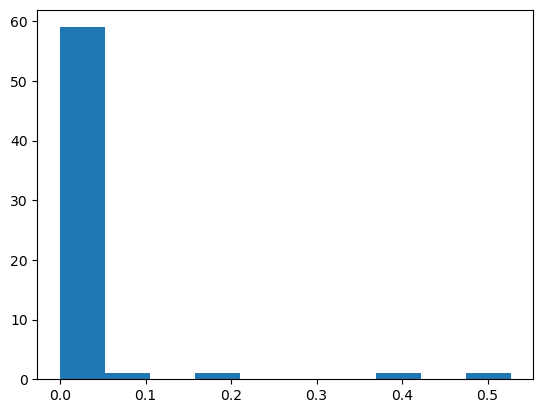

In [ ]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(g_413).values()))
plt.show()


# **Connected component subgraphs**

TypeError: draw() takes 0 positional arguments but 1 was given

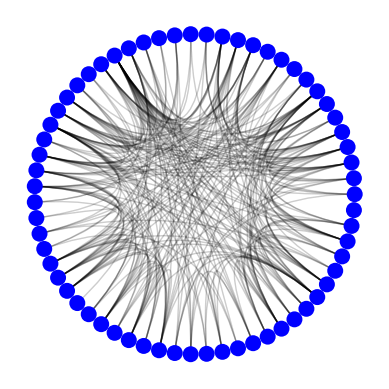

In [ ]:
random.seed(121)
G = nx.erdos_renyi_graph(n=20, p=0.3)
circ = nv.CircosPlot(g_413)  # node_color='key', node_group='key')
circ.draw()

In [ ]:
random.seed(60)
G = nx.erdos_renyi_graph(n=100, p=0.03)
nx.connected_components(G)  # connected_componet_subgraphs() is deprecated

<generator object connected_components at 0x7fbd201c6f50>

# **a) MatrixPlot**
**MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number.**

In [ ]:
subgraphs = [G.subgraph(c) for c in nx.connected_components(G)]
subgraphs

Subgraph has 96 nodes


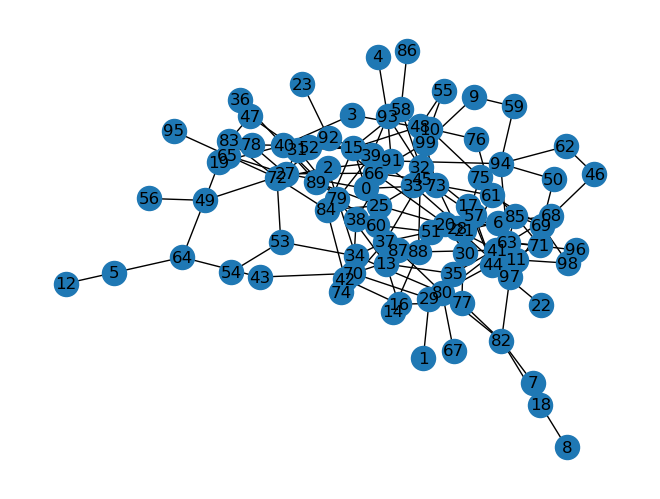

Subgraph has 1 nodes


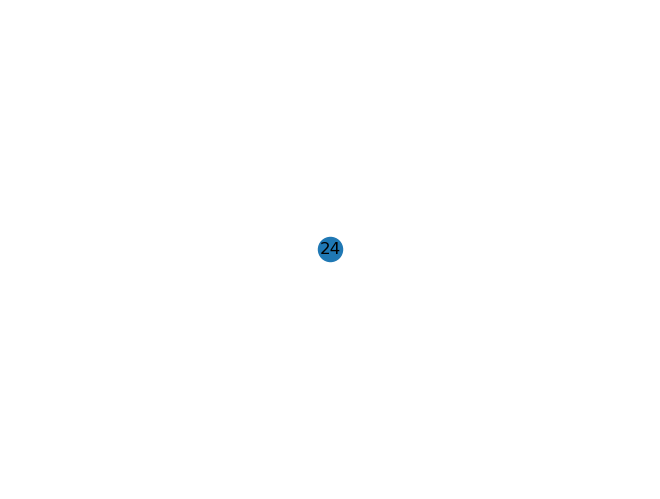

Subgraph has 1 nodes


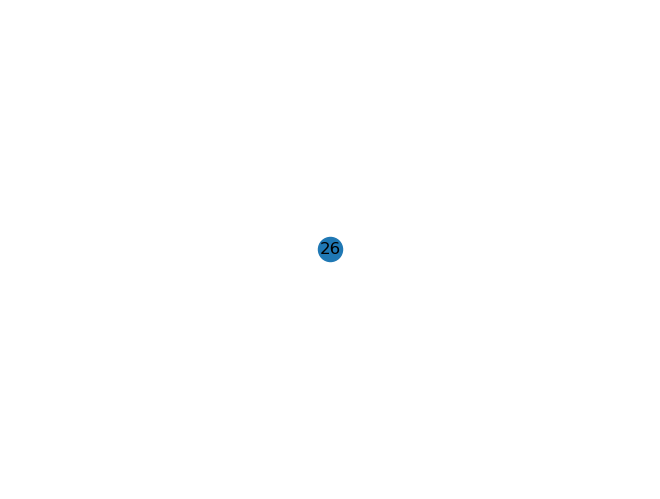

Subgraph has 1 nodes


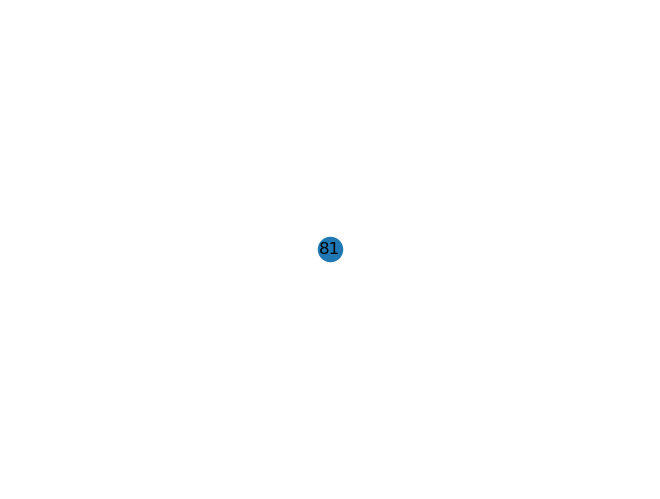

Subgraph has 1 nodes


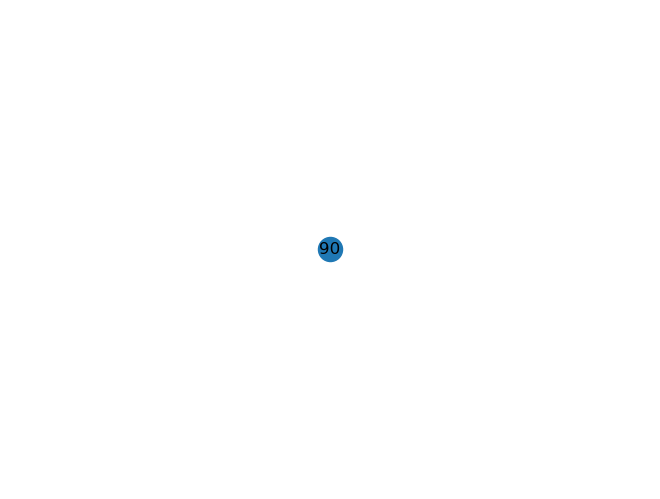

In [ ]:
for sg in subgraphs:
    print(f'Subgraph has {len(sg.nodes())} nodes')
    nx.draw(sg, with_labels=True)
    plt.show()

In [ ]:
subgraphs = [g_413.subgraph(c) for c in nx.connected_components(g_413)]
subgraphs

TypeError: draw() takes 0 positional arguments but 1 was given

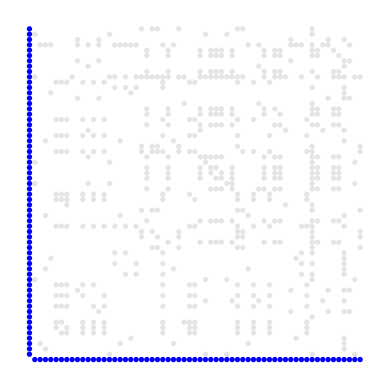

In [ ]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(subgraphs, key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = nv.MatrixPlot(largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

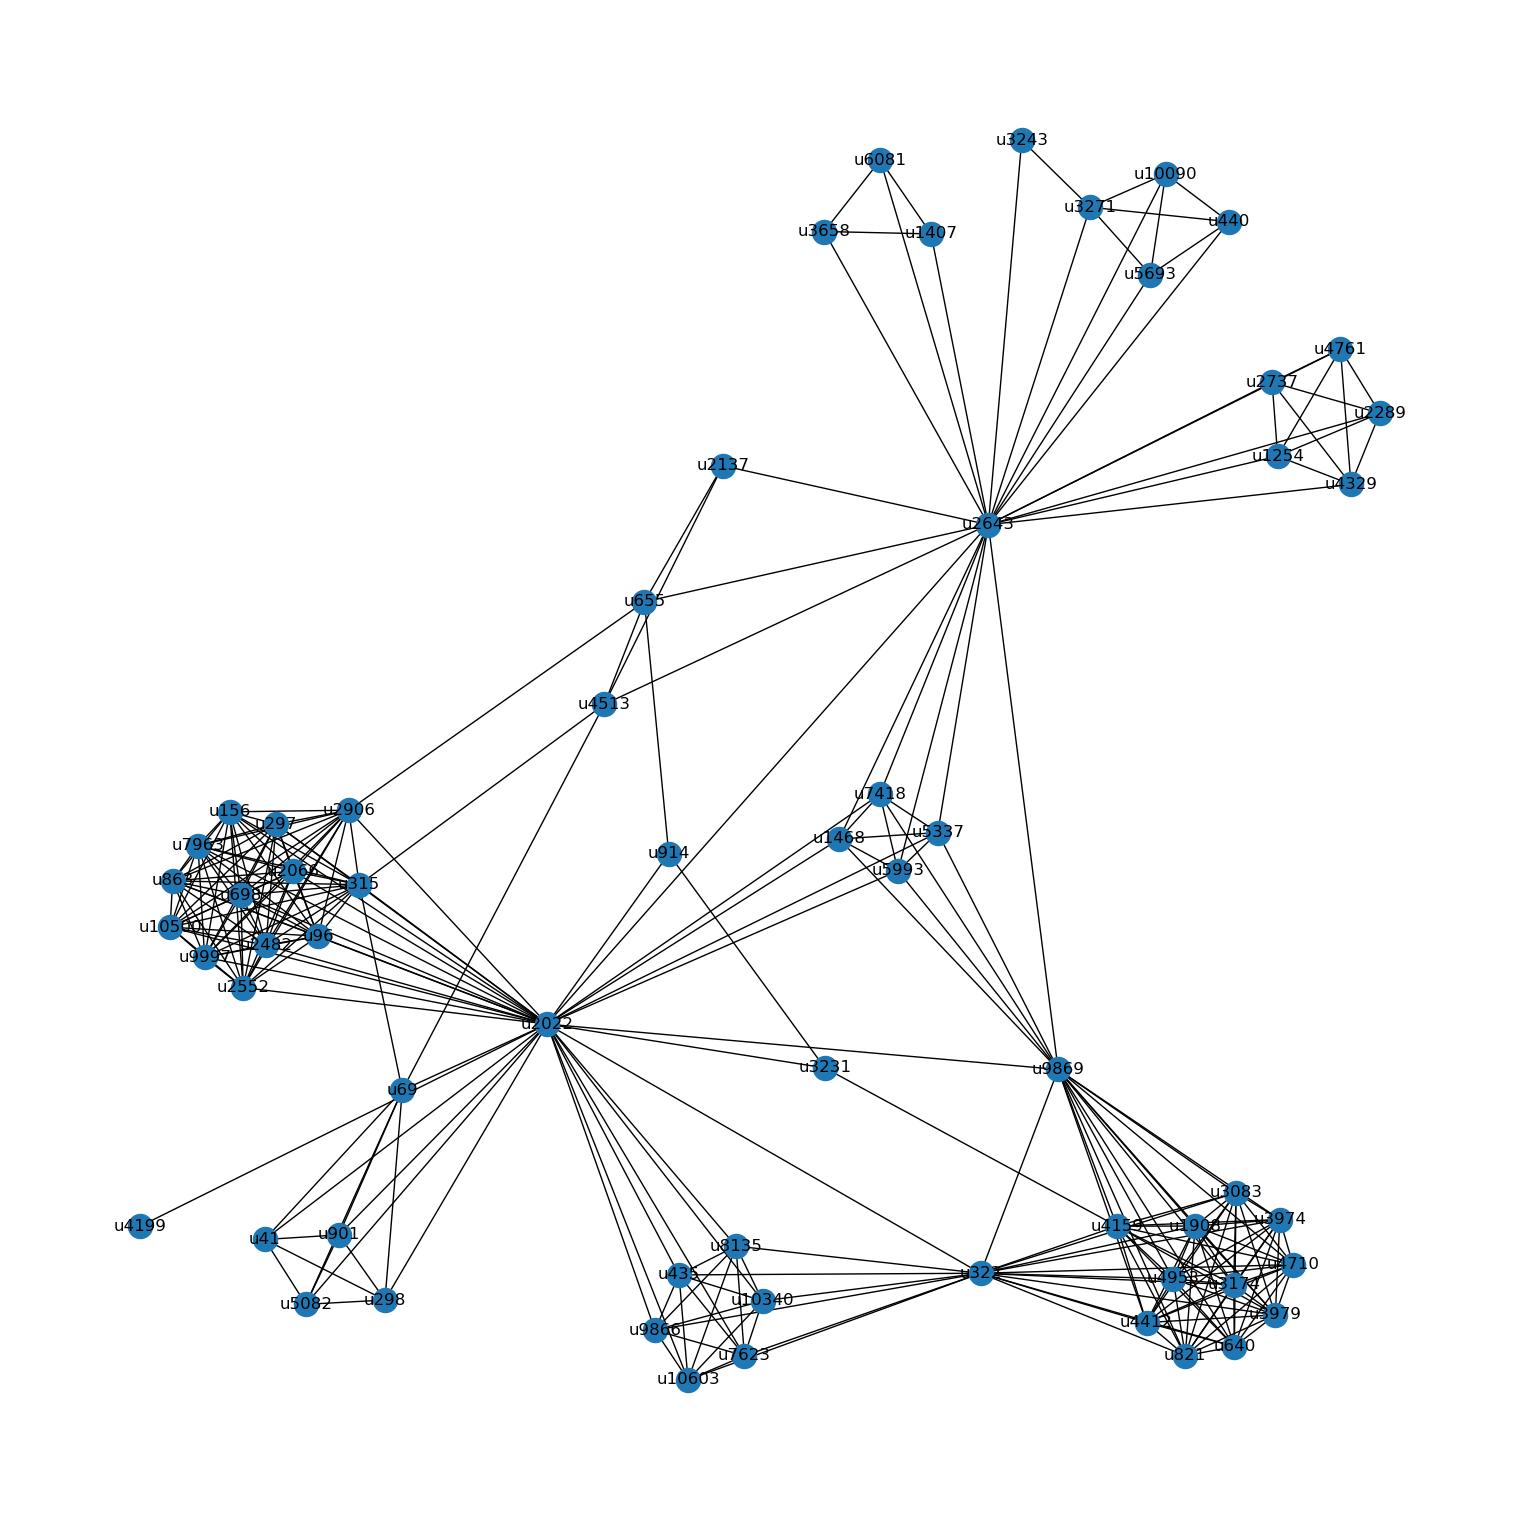

In [ ]:
plt.figure(figsize=(15, 15))
nx.draw(largest_ccs, with_labels=True)
plt.show()

# **b) ArcPlot**
**ArcPlot of the GitHub collaboration network, with authors sorted by degree**

TypeError: draw() takes 0 positional arguments but 1 was given

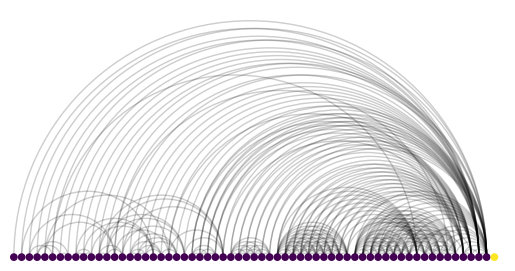

In [ ]:
# Iterate over all the nodes in G, including the metadata
for n, d in g_413.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    g_413.nodes[n]['degree'] = nx.degree(g_413, n)

# Create the ArcPlot object: a
a = nv.ArcPlot(g_413, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

# **c) CircosPlot**
**CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their 'grouping' key. **

TypeError: draw() takes 0 positional arguments but 1 was given

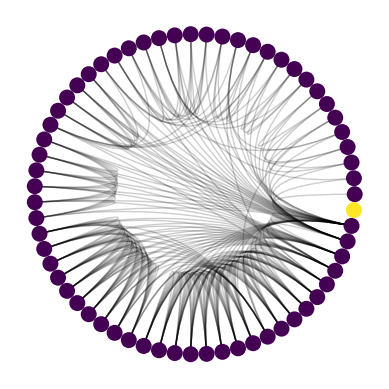

In [ ]:
# Iterate over all the nodes in G, including the metadata
for n, d in g_413.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    g_413.nodes[n]['degree'] = nx.degree(g_413, n)

# Create the ArcPlot object: a
a = nv.CircosPlot(g_413, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

**Inference : This CircosPlot provides a compact alternative to the ArcPlot. It is easy to see in this plot that most users belong to one group.**

# **4.2) Cliques**

In [ ]:
G = nx.erdos_renyi_graph(n=100, p=0.15)
print(nx.find_cliques(G))

clique_lens = Counter([len(clique) for clique in nx.find_cliques(G)])
clique_lens

<generator object find_cliques at 0x7fbd22b27250>


Counter({3: 374, 4: 40, 2: 80})

# **Finding cliques (I)**

**Finding Number of Maximum Cliques in the network**

In [ ]:
cliques = sorted([len(cl) for cl in nx.find_cliques(g_413)], reverse=True)
print(cliques)
print(f'There are {len(cliques)} cliques.')

[14, 13, 8, 7, 6, 6, 5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1]
There are 19 cliques.


# **Finding cliques (II)**

**Finding & Plotting a particular Maximal Clique**

The largest maximal clique consists of 14 users


TypeError: draw() takes 0 positional arguments but 1 was given

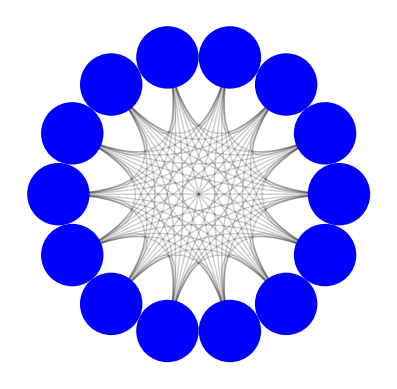

In [ ]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(g_413), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = g_413.subgraph(largest_clique)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_lc)

# Draw the CircosPlot to the screen
print(f'The largest maximal clique consists of {len(largest_clique)} users')
c.draw()
plt.show()

# **4.3) Finding important collaborators**

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(g_413)

# Sorting the dictionary
deg_cent = {k: v for k, v in sorted(deg_cent.items(), key=lambda item: item[1], reverse=True)}

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(f'The most prolific collaborator(s): {prolific_collaborators}')

The most prolific collaborator(s): ['u2022']


In [ ]:
max_dc

0.5483870967741935

In [ ]:
deg_cent

{'u2022': 0.5483870967741935,
 'u2643': 0.3548387096774194,
 'u322': 0.3064516129032258,
 'u9869': 0.29032258064516125,
 'u315': 0.24193548387096775,
 'u2906': 0.22580645161290322,
 'u96': 0.2096774193548387,
 'u156': 0.2096774193548387,
 'u297': 0.2096774193548387,
 'u698': 0.2096774193548387,
 'u863': 0.2096774193548387,
 'u2066': 0.2096774193548387,
 'u2482': 0.2096774193548387,
 'u2552': 0.2096774193548387,
 'u4159': 0.2096774193548387,
 'u7963': 0.2096774193548387,
 'u9997': 0.2096774193548387,
 'u10500': 0.2096774193548387,
 'u640': 0.1935483870967742,
 'u821': 0.1935483870967742,
 'u1908': 0.1935483870967742,
 'u3083': 0.1935483870967742,
 'u3174': 0.1935483870967742,
 'u3974': 0.1935483870967742,
 'u3979': 0.1935483870967742,
 'u4412': 0.1935483870967742,
 'u4710': 0.1935483870967742,
 'u4953': 0.1935483870967742,
 'u69': 0.11290322580645161,
 'u435': 0.11290322580645161,
 'u7623': 0.11290322580645161,
 'u8135': 0.11290322580645161,
 'u9866': 0.11290322580645161,
 'u10340': 0.1

# **4.4) Characterizing editing communities**

{'u156', 'u2906', 'u315', 'u7963', 'u698', 'u9997', 'u2552', 'u297', 'u96', 'u2482', 'u10500', 'u2066', 'u863', 'u2022'}


TypeError: draw() takes 0 positional arguments but 1 was given

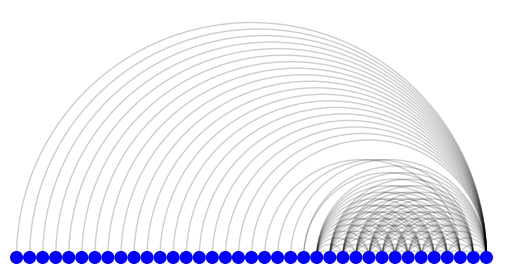

In [ ]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(g_413), key=lambda x: len(x))[-1])
print(largest_max_clique)

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = g_413.subgraph(largest_max_clique).copy()
display(G_lmc)

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(g_413.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(g_413.neighbors(node))), g_413.neighbors(node)))
    
# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.nodes[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = nv.ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

# **4.5) Recommending co-editors who have yet to edit together**

**Leveraging the concept of open triangles to recommend users on GitHub to collaborate**

In [ ]:
G = nx.Graph(Gh)

In [ ]:
# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in g_413.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(g_413.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not g_413.has_edge(n1, n2):

            # Increment recommended
            recommended[((n1), (n2))] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(f'Pairs of users who should collaborate: {top10_pairs}')

Pairs of users who should collaborate: [('u2022', 'u4159'), ('u655', 'u2022')]


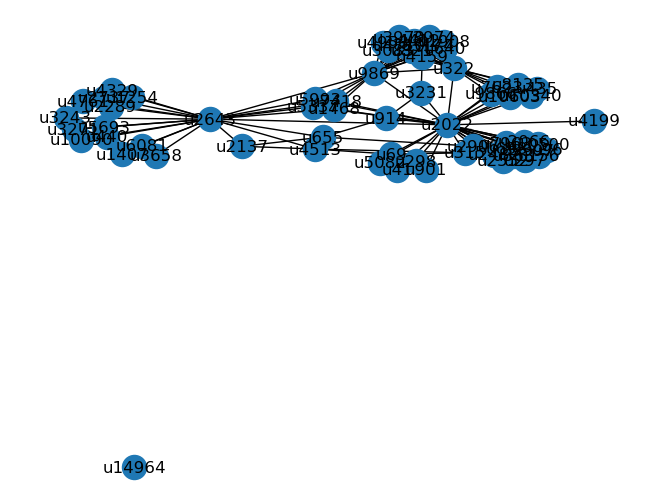

In [ ]:
nx.draw(g_413, with_labels=True)
plt.show()